<center><h1>MCD: Ciencia de Datos Responsable</h1><center>
<h2>Tutorial 14 - DataSynthesizer</h2>


En este tutorial se presenta DataSynthesizer (Ping et al., 2017), una herramienta que nos permite crear datos sintéticos a partir de un dataset con datos sensibles. Estos datos sintéticos son tanto estructuralmente como estadísticamente similares a los datos originales.

Una de las problemáticas al trabajar con datos sensibles es la disponibilización de estos para la colaboración en projectos de por ejemplo bienestar social o salud. Esto supone un gran contratiempo a la hora de llevar adelante tales proyectos. Una solución para este problema es trabajar con datos sintéticos que sean estructuralmente y estadísticamente similares a los datos originales y que ofrezcan fuertes garantías de privacidad. De esta forma, los cientistas de datos pueden desarrollar modelos y métodos sobre estos datos sintéticos, con cierto grado de confianza de que este trabajo será significativo cuando se aplique sobre los datos reales. DataSynthesizer nos permite obtener tales datos sintéticos.

## ¿Cómo funciona DataSynthesizer?

La arquitectura de DataSynthesizer se basa en 3 componentes: DataDescriber, DataGenerator y ModelInspector.

1. DataDescriber: Se encarga de procesar el dataset input. Obtiene los dominios de cada uno de los atributos además de inferir las distribuciones estimadas de cada uno. Esta información es almacenada en un archivo que describe el dataset. Puede ser invocado en 3 modos:
- Independent attribute mode, donde la distribución de cada atributo es independiente del resto de los atributos.
- Correlated attribute mode, que usa un algoritmo que construye redes bayesianas para modelar los atributos correlacionados. Así las distribuciones de cada atributo están condicionadas sobre otros atributos (ej. ingresos y edad).

- Random mode, que simplemente genera valores aleatorios para los atributos (que sigan teniendo sentido) sampleando sobre una distribución uniforme.

Cada uno de estos modos implementa distintos métodos de privacidad diferencial.

¿Cual usamos? En (Ping et al., 2017) se menciona:

> En los casos en los que Correlated attribute mode sea demasiado costoso desde el punto de vista computacional o cuando no haya datos suficientes para derivar un modelo razonable, se puede utilizar Independent attribute mode (...). Finalmente, para casos de datos extremadamente sensibles, se puede usar el modo aleatorio que simplemente genera valores aleatorios consistentes con el tipo para cada atributo.


2. DataGenerator: Toma como input el archivo de descripción del dataset generado por DataDescriber y samplea desde las distribuciones en este archivo. Se puede especificar el número de registros deseados.

3. ModelInspector: Provee de funciones para inspeccionar la similitud entre el input (privado) y los datos sintéticos (output). Los atributos en datos sintéticos deberían tener distribuciones similares a los atributos en los datos originales.

Veremos la implementación de esta herramienta sobre el dataset `adult data` que ya hemos trabajado en otras ocasiones, en este caso utilizaremos una versión que se encuentra disponible en el [repositorio de DataSynthesizer](https://github.com/DataResponsibly/DataSynthesizer).



In [ ]:
# Instalamos la librería.
!pip install DataSynthesizer


In [ ]:
# Importamos librerías a utilizar
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# DataSynthesizer
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file

In [ ]:
# Iniciamos leyendo nuestros datos originales.
source = 'https://raw.githubusercontent.com/DataResponsibly/DataSynthesizer/master/notebooks/data/adult_reduced.csv'
adult = pd.read_csv(source)
adult.head()

,age,education,sex,relationship,marital-status,income
0,39,Bachelors,Male,Not-in-family,Never-married,<=50K
1,50,Bachelors,Male,Husband,Married-civ-spouse,<=50K
2,38,HS-grad,Male,Not-in-family,Divorced,<=50K
3,53,11th,Male,Husband,Married-civ-spouse,<=50K
4,28,Bachelors,Female,Wife,Married-civ-spouse,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education       32561 non-null  object
 2   sex             32561 non-null  object
 3   relationship    32561 non-null  object
 4   marital-status  32561 non-null  object
 5   income          32561 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


Tenemos un total de 32561 datos, con atributos de edad, educación, sexo, relación, estado marital e ingresos. Pasemos ahora a DataSynthesizer. Lo primero será instanciar a DataDescriber y DataGenerator.

In [ ]:
# Instanciamos a DataDescriber y DataGenerator.
describer = DataDescriber()
generator = DataGenerator()

## Usando DataDescriber.

El procedimiento para DataDescriber es el siguiente:

- Obtener la descripción del dataset en alguno de los modos.
- Guardar dicha descripción en un archivo local (en formato JSON).

### Independent attribute mode.

In [ ]:
# Generamos la descripción del dataset.
describer.describe_dataset_in_independent_attribute_mode(source)

In [ ]:
# Guardamos la descripción en un archivo local.
describer.save_dataset_description_to_file('independent.json')

### Correlated attribute mode.

In [ ]:
# Generamos la descripción del dataset.
describer.describe_dataset_in_correlated_attribute_mode(source)

================ Constructing Bayesian Network (BN) ================
Adding ROOT relationship
Adding attribute marital-status
Adding attribute sex
Adding attribute education
Adding attribute age
Adding attribute income
========================== BN constructed ==========================


/usr/local/lib/python3.10/dist-packages/DataSynthesizer/lib/PrivBayes.py:275: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for parents_instance, stats_sub in stats.groupby(parents):


In [ ]:
# Guardamos la descripción en un archivo local.
describer.save_dataset_description_to_file('correlated.json')

### Random mode

In [ ]:
# Generamos la descripción del dataset
describer.describe_dataset_in_random_mode(source)

In [ ]:
# Guardamos la descripción en un archivo local.
describer.save_dataset_description_to_file('random.json')

## Usando DataGenerator.

Ahora usamos las descripciones obtenidas anteriormente para generar datos sintéticos.

### Independent attribute mode.


In [ ]:
# Generamos los datos sintéticos.
generator.generate_dataset_in_independent_mode(n=2000, description_file='independent.json', seed=0)

In [ ]:
# Guardamos los datos sintéticos.
generator.save_synthetic_data('independent.csv')

In [ ]:
# Veamos que efectivamente se han creado datos sintéticos.

independent = pd.read_csv('independent.csv')
independent.head()

,age,education,sex,relationship,marital-status,income
0,42.0,Some-college,Female,Husband,Married-civ-spouse,<=50K
1,45.0,HS-grad,Male,Not-in-family,Married-civ-spouse,<=50K
2,40.0,HS-grad,Female,Other-relative,Never-married,<=50K
3,36.0,Bachelors,Male,Not-in-family,Married-civ-spouse,<=50K
4,33.0,HS-grad,Female,Husband,Divorced,<=50K


### Correlated attribute mode.

In [ ]:
# Generamos los datos sintéticos.
generator.generate_dataset_in_correlated_attribute_mode(n=2000, description_file='correlated.json', seed=0)

In [ ]:
# Guardamos los datos sintéticos.
generator.save_synthetic_data('correlated.csv')

In [ ]:
# Veamos que efectivamente se han creado datos sintéticos.

correlated = pd.read_csv('correlated.csv')
correlated.head()

,age,education,sex,relationship,marital-status,income
0,53.0,Prof-school,Female,Other-relative,Never-married,<=50K
1,85.0,9th,Male,Own-child,Never-married,<=50K
2,22.0,Some-college,Female,Own-child,Never-married,<=50K
3,43.0,Bachelors,Male,Other-relative,Divorced,<=50K
4,70.0,Doctorate,Male,Not-in-family,Widowed,>50K


### Random mode.

En este caso debemos especificar un máximo y mínimo para la distribución uniforme de donde se samplean los datos.

In [ ]:
# Generamos los datos sintéticos.
generator.generate_dataset_in_random_mode(n=2000, description_file='random.json', seed=0,
                                          minimum=0, maximum=100)

In [ ]:
# Guardamos los datos sintéticos.
generator.save_synthetic_data('random.csv')

In [ ]:
# Veamos que efectivamente se han creado datos sintéticos.

random = pd.read_csv('random.csv')
random.head()

,age,education,sex,relationship,marital-status,income
0,44,10th,Male,Wife,Divorced,>50K
1,47,1st-4th,Male,Husband,Married-AF-spouse,>50K
2,64,Assoc-acdm,Male,Wife,Married-AF-spouse,<=50K
3,67,5th-6th,Male,Other-relative,Separated,<=50K
4,67,Prof-school,Female,Husband,Divorced,<=50K


## Usando ModelInspector.

Ahora utilizaremos ModelInspector para comparar las distribuciones entre los datos originales y los distintos datos sintéticos. Instanciamos a ModelInspector para cada uno de los casos.

### Independent attribute mode.

In [ ]:
# Instanciamos ModelInspector
independent_description = read_json_file('independent.json')['attribute_description']
i_inspector = ModelInspector(adult, independent, independent_description)

/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprec

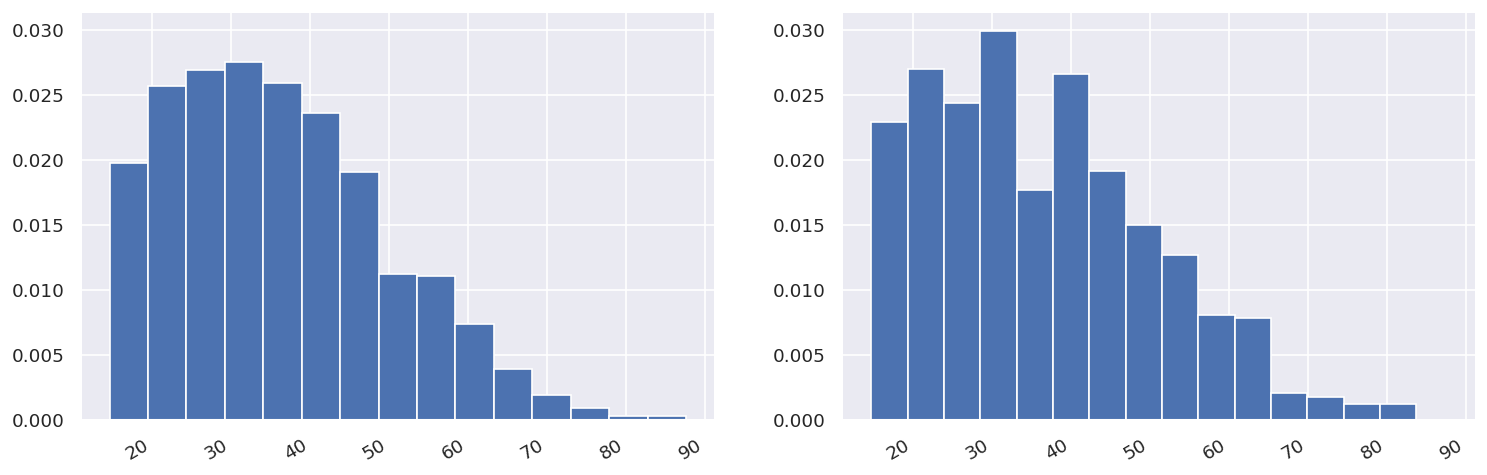

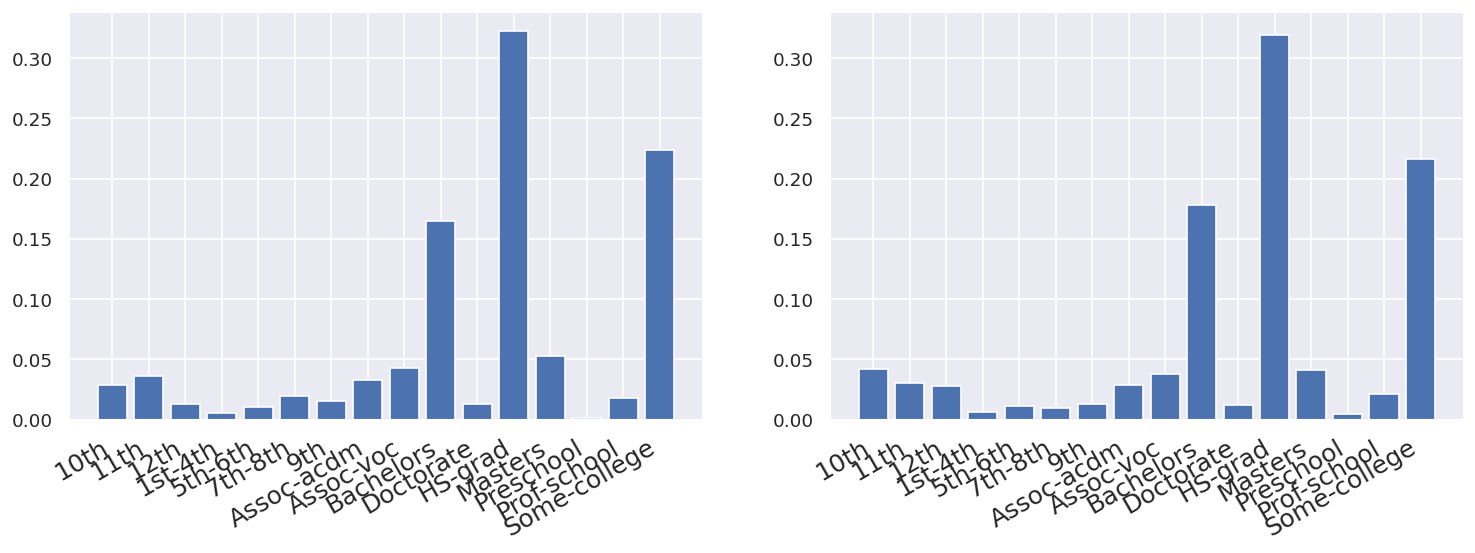

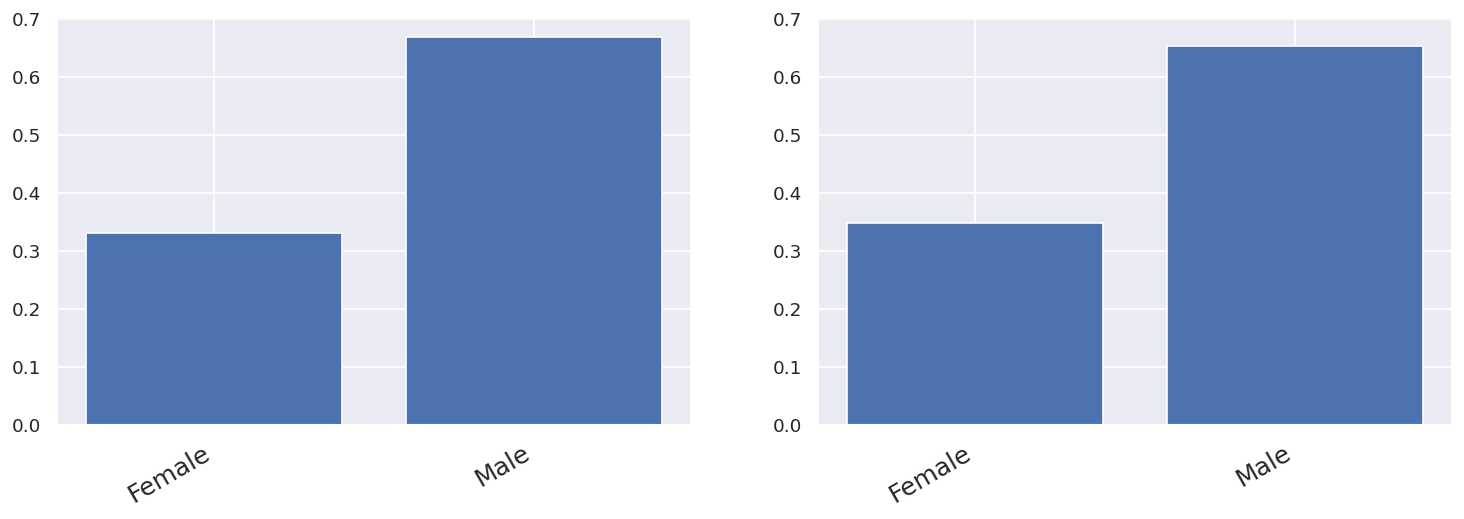

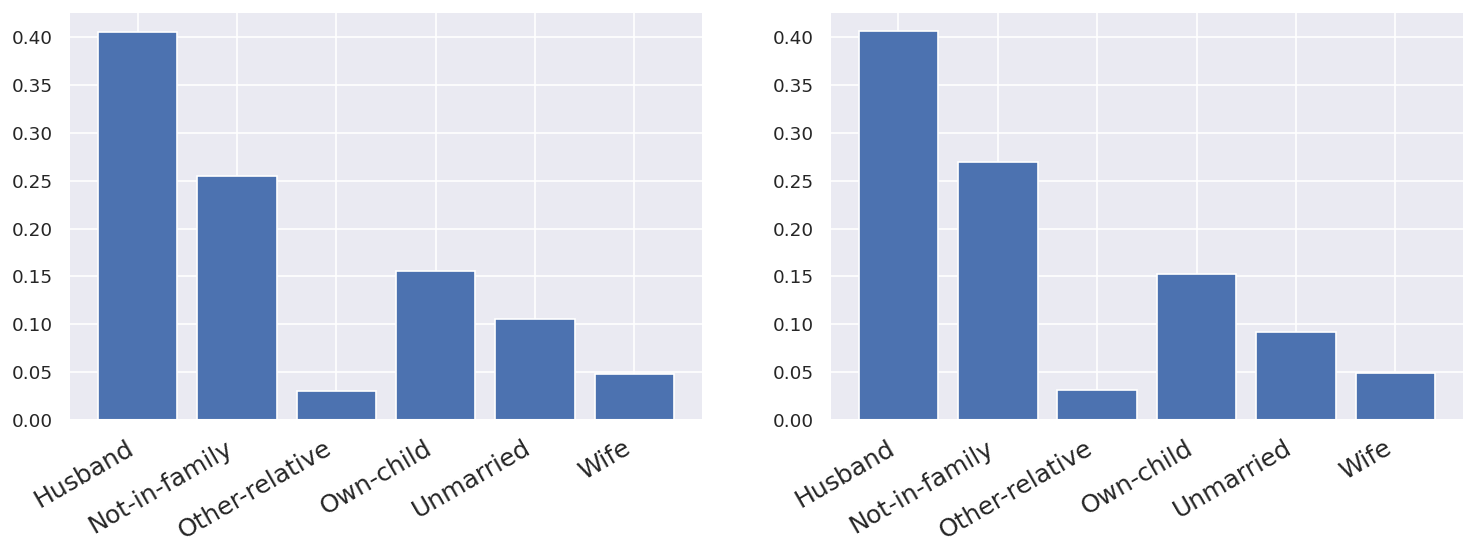

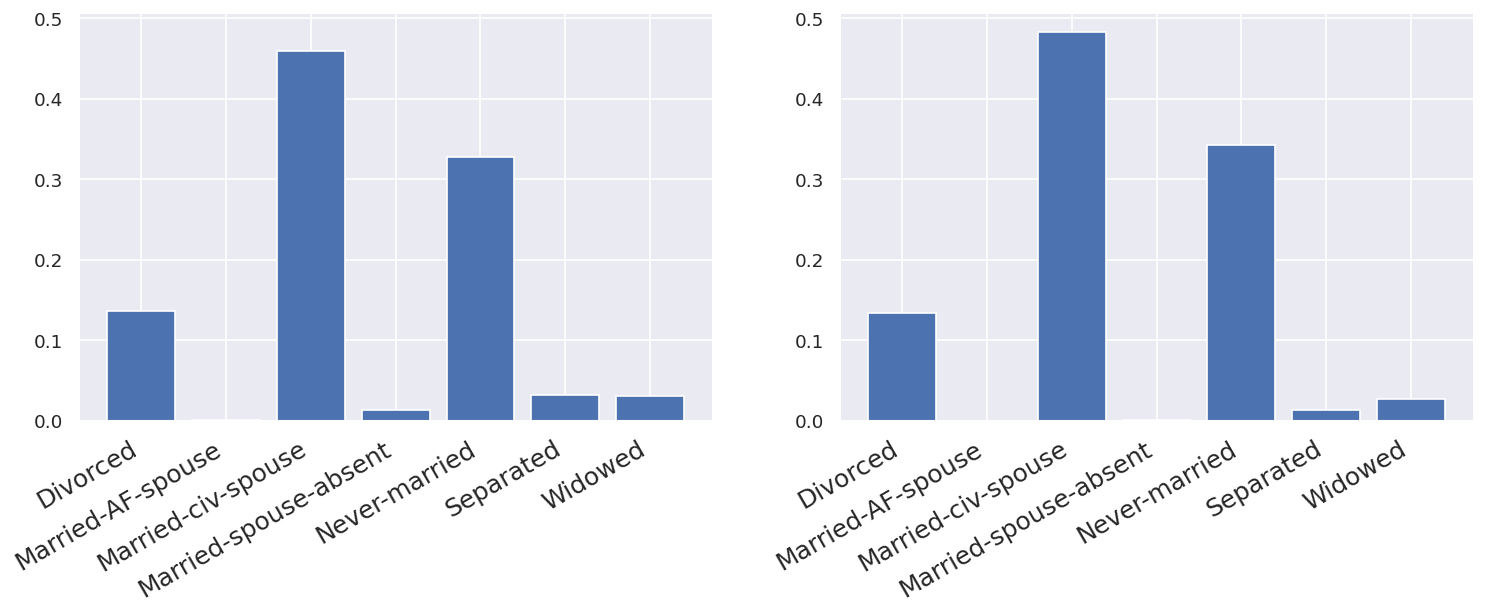

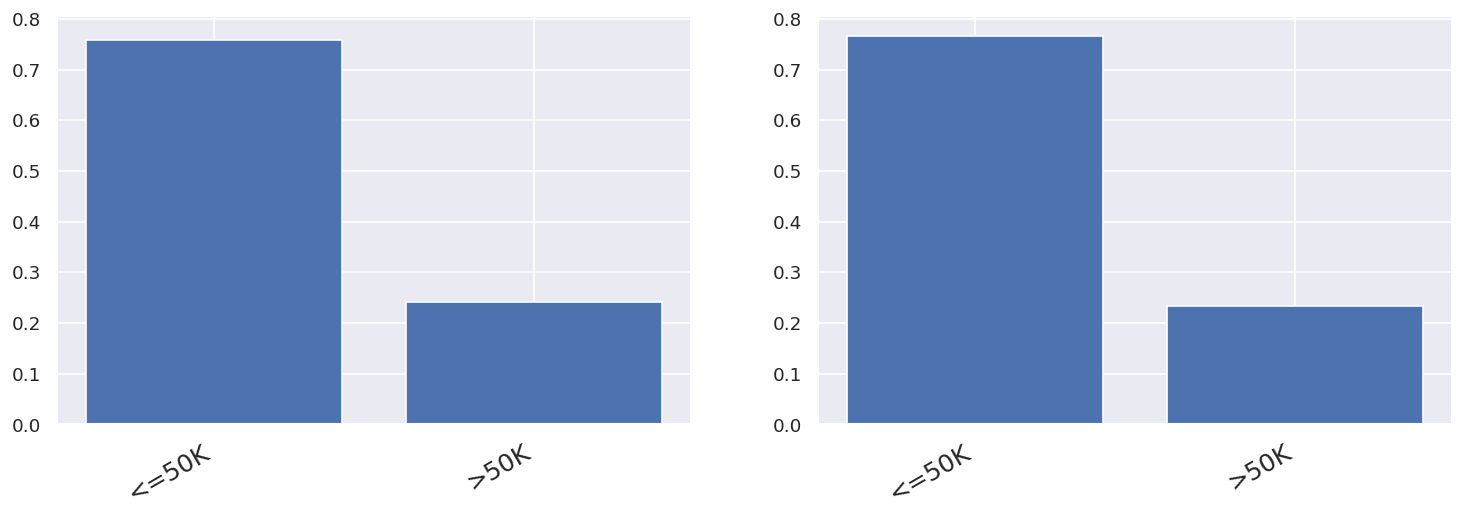

In [ ]:
# Con ModelInspector podemos comparar las distribuciones de los atributos.

for attr in independent.columns:
  i_inspector.compare_histograms(attr)

Podemos ver que las distribuciones de los atributos entre ambos datasets son bastante similares, pero ¿qué ocurre con las correlaciones de estos atributos? Podemos comprobar la situación con `mutual_information_heatmap`.

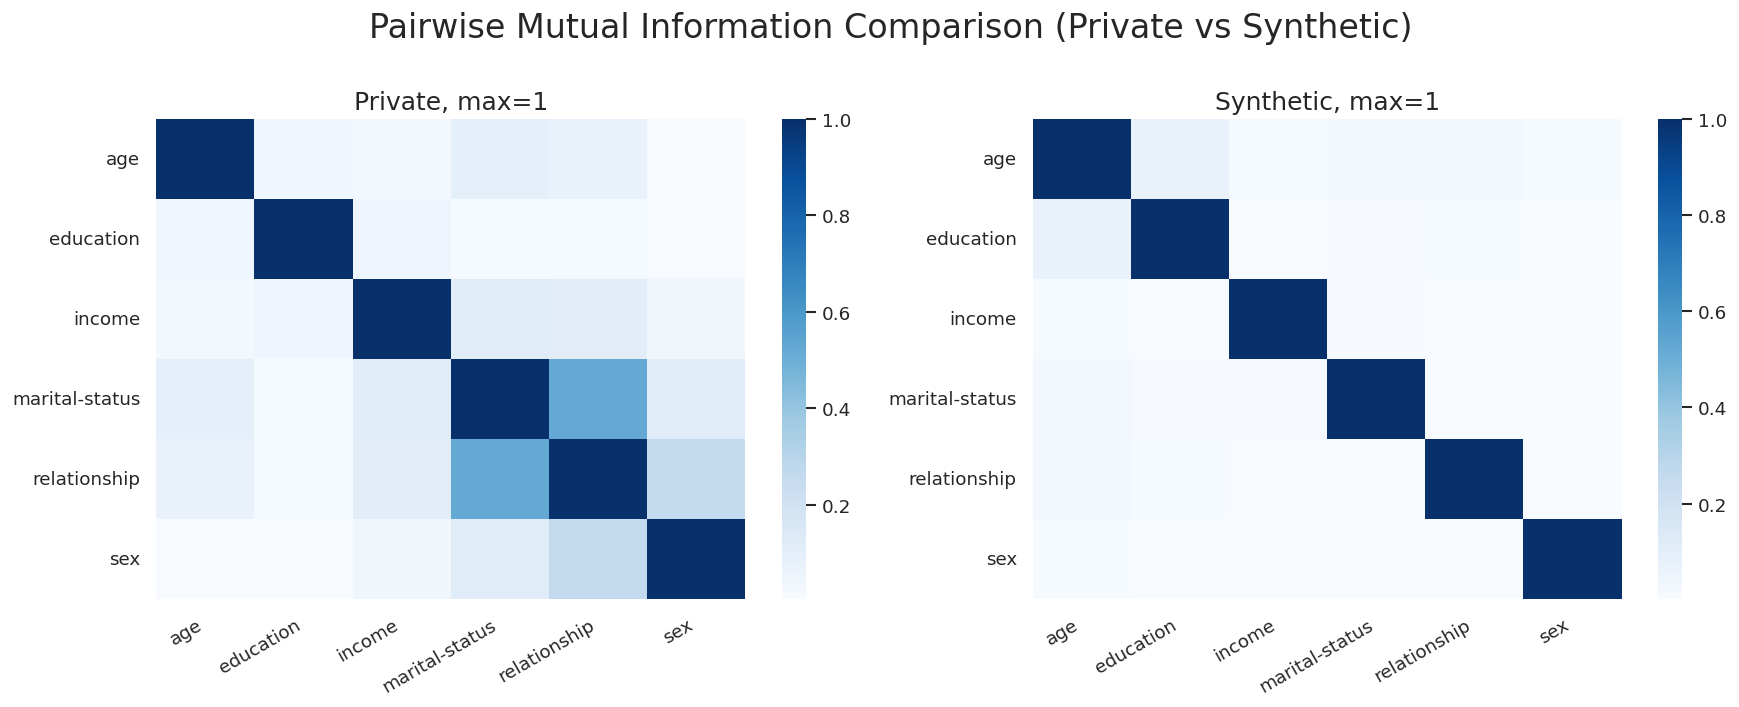

In [ ]:
i_inspector.mutual_information_heatmap()

### Correlated attribute mode.

In [ ]:
# Instanciamos ModelInspector

correlated_description = read_json_file('correlated.json')['attribute_description']
c_inspector = ModelInspector(adult, correlated, correlated_description)

/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprec

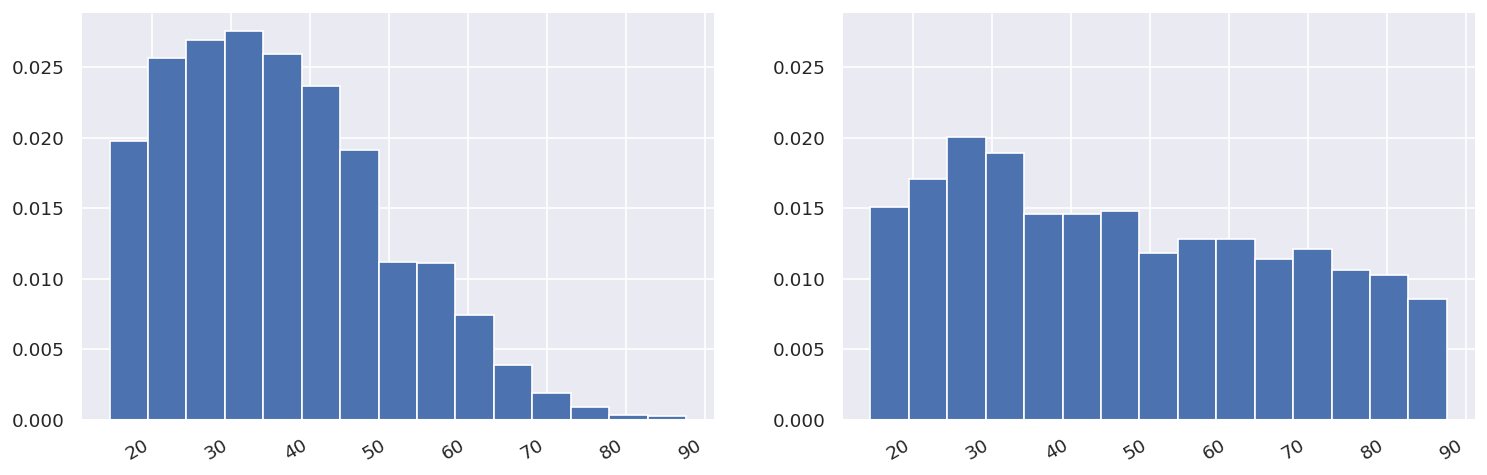

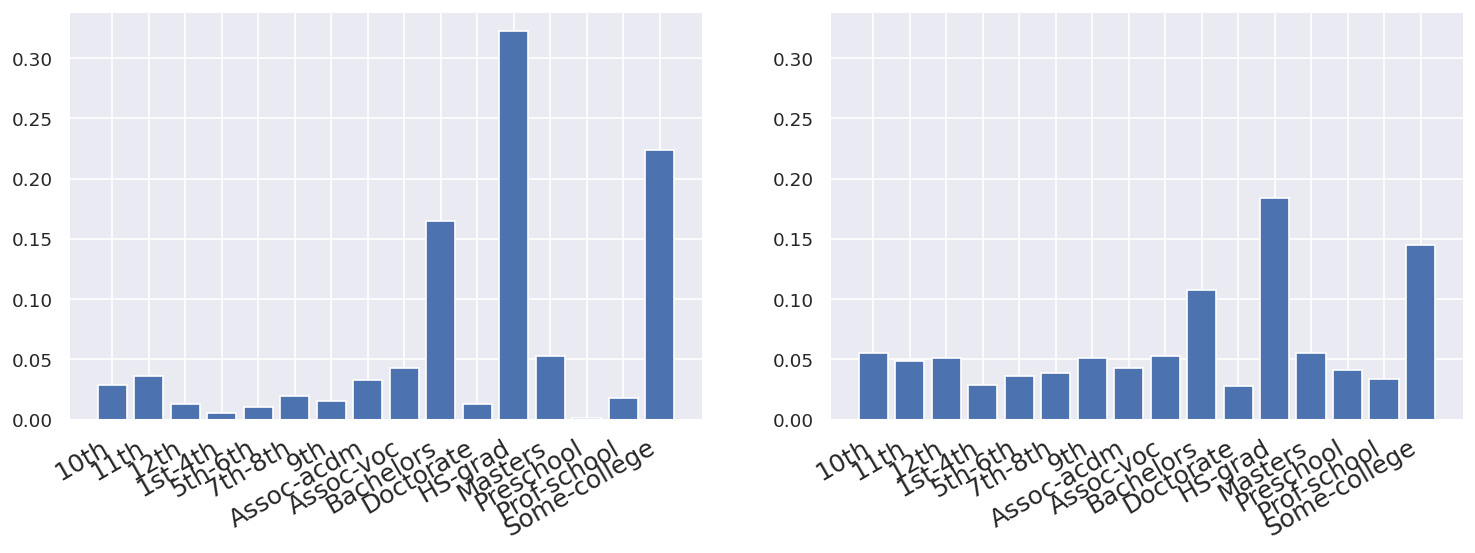

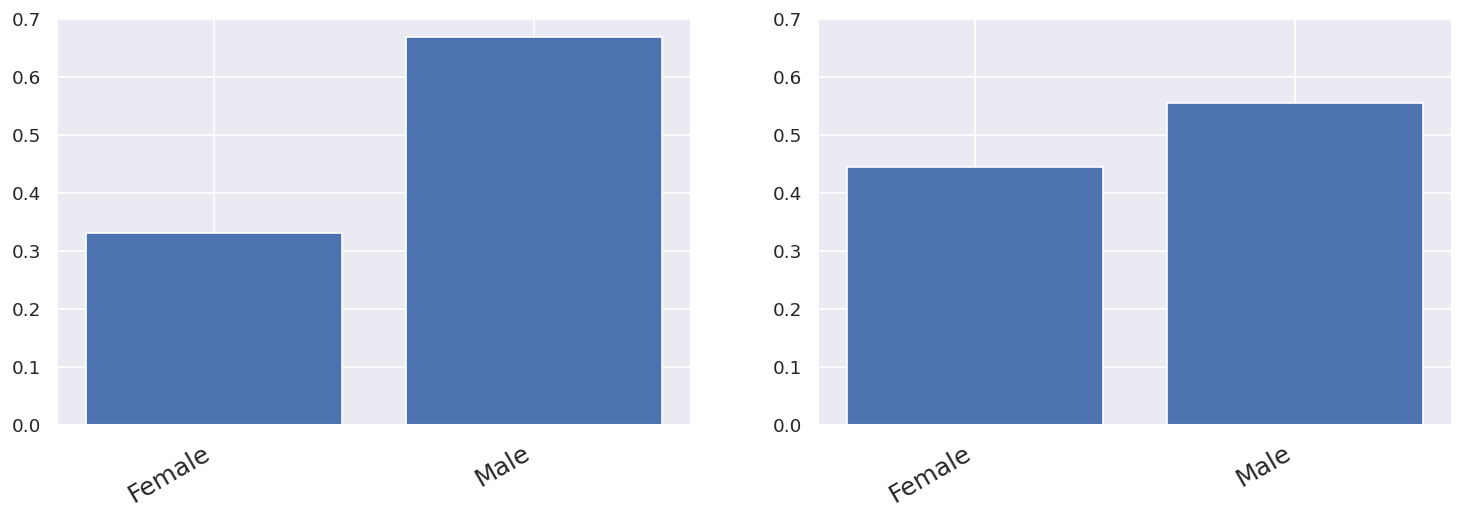

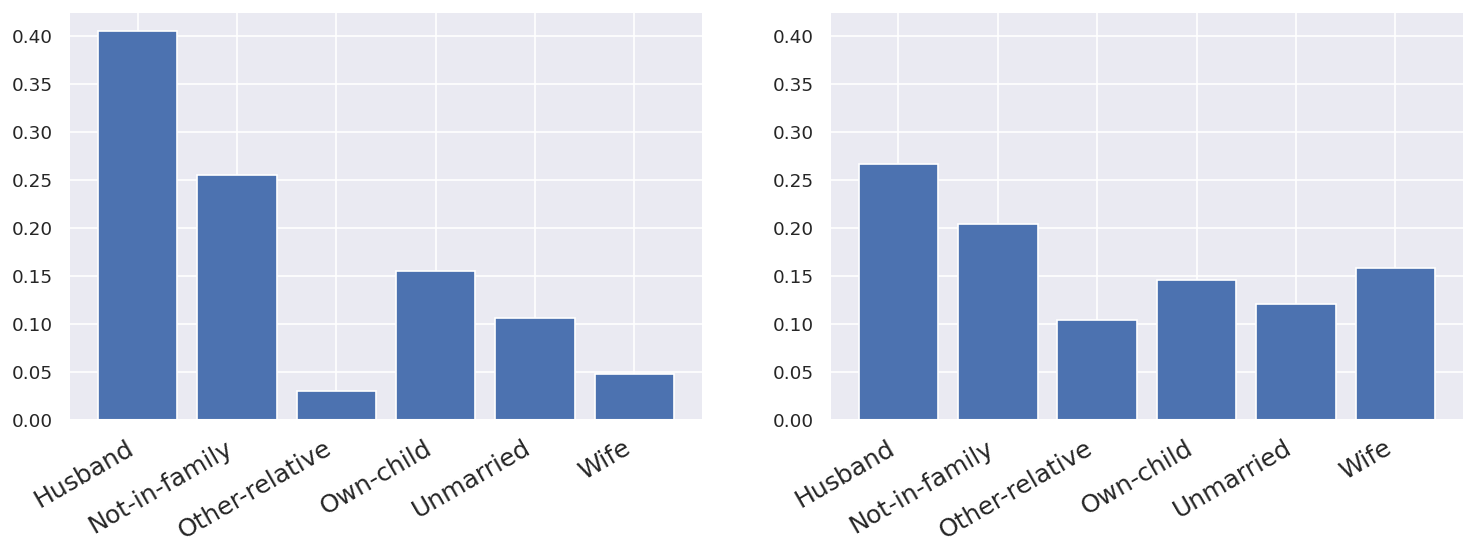

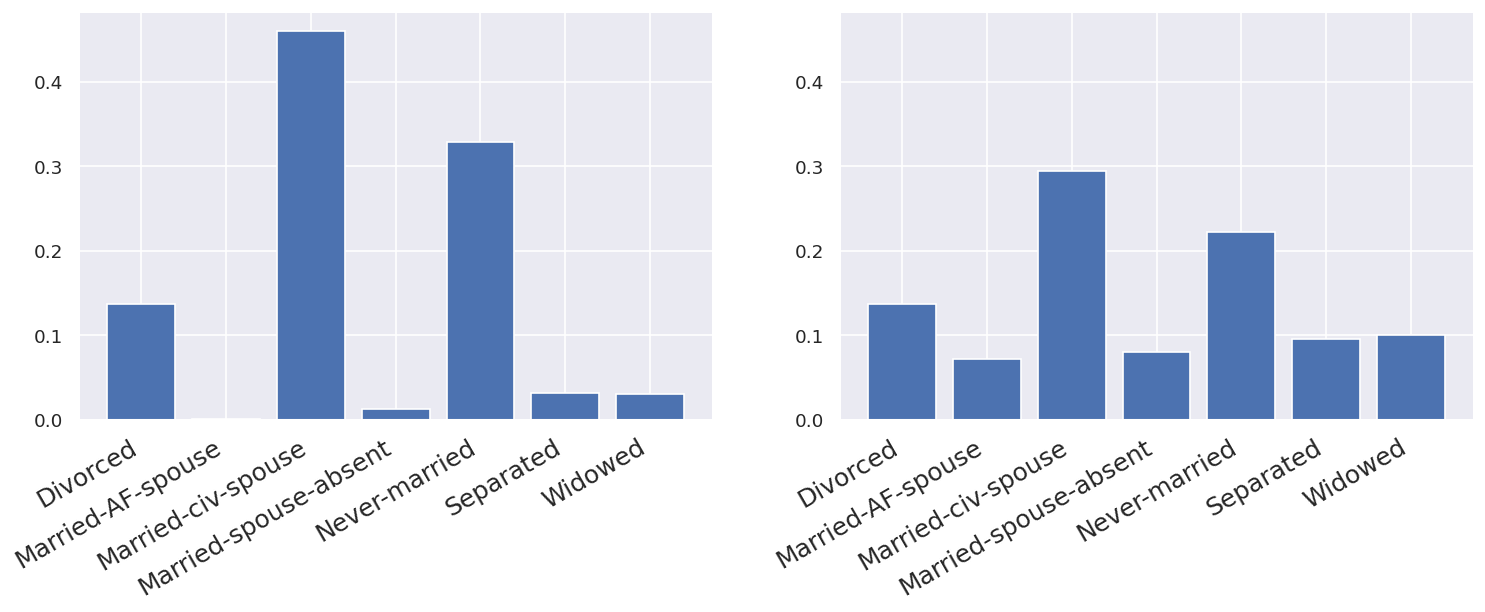

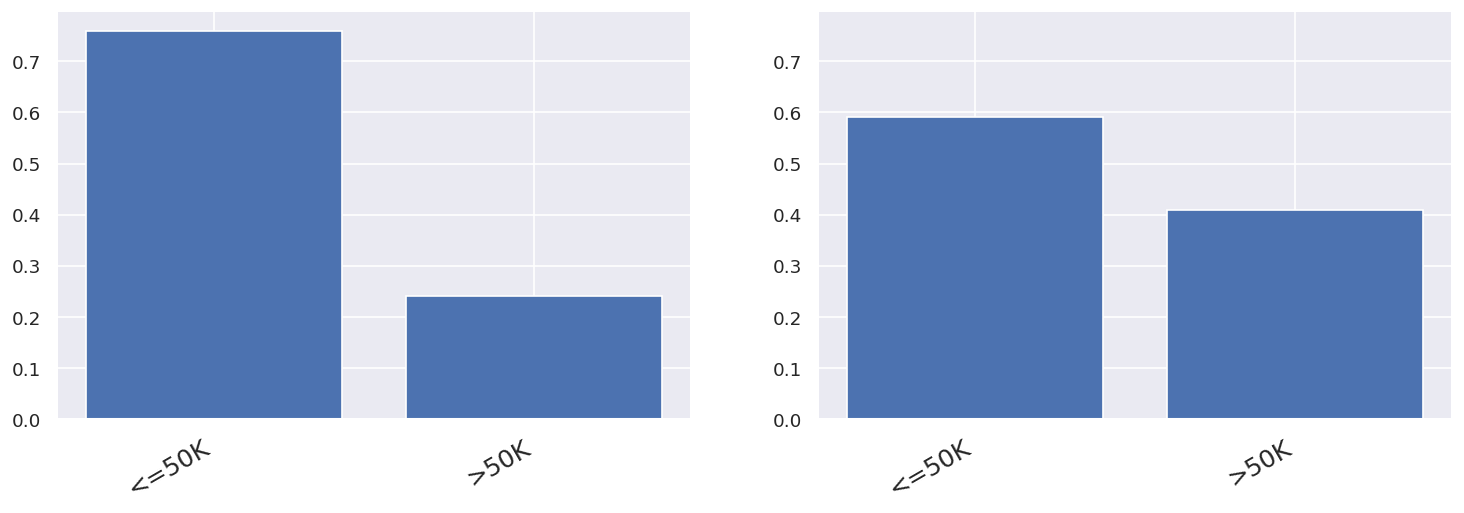

In [ ]:
# Con ModelInspector podemos comparar las distribuciones de los atributos.

for attr in correlated.columns:
  c_inspector.compare_histograms(attr)

En este caso podemos observar que las distribuciones son ligeramente distintas entre ambos datasets. ¿Qué sucede con la correlación entre los atributos?

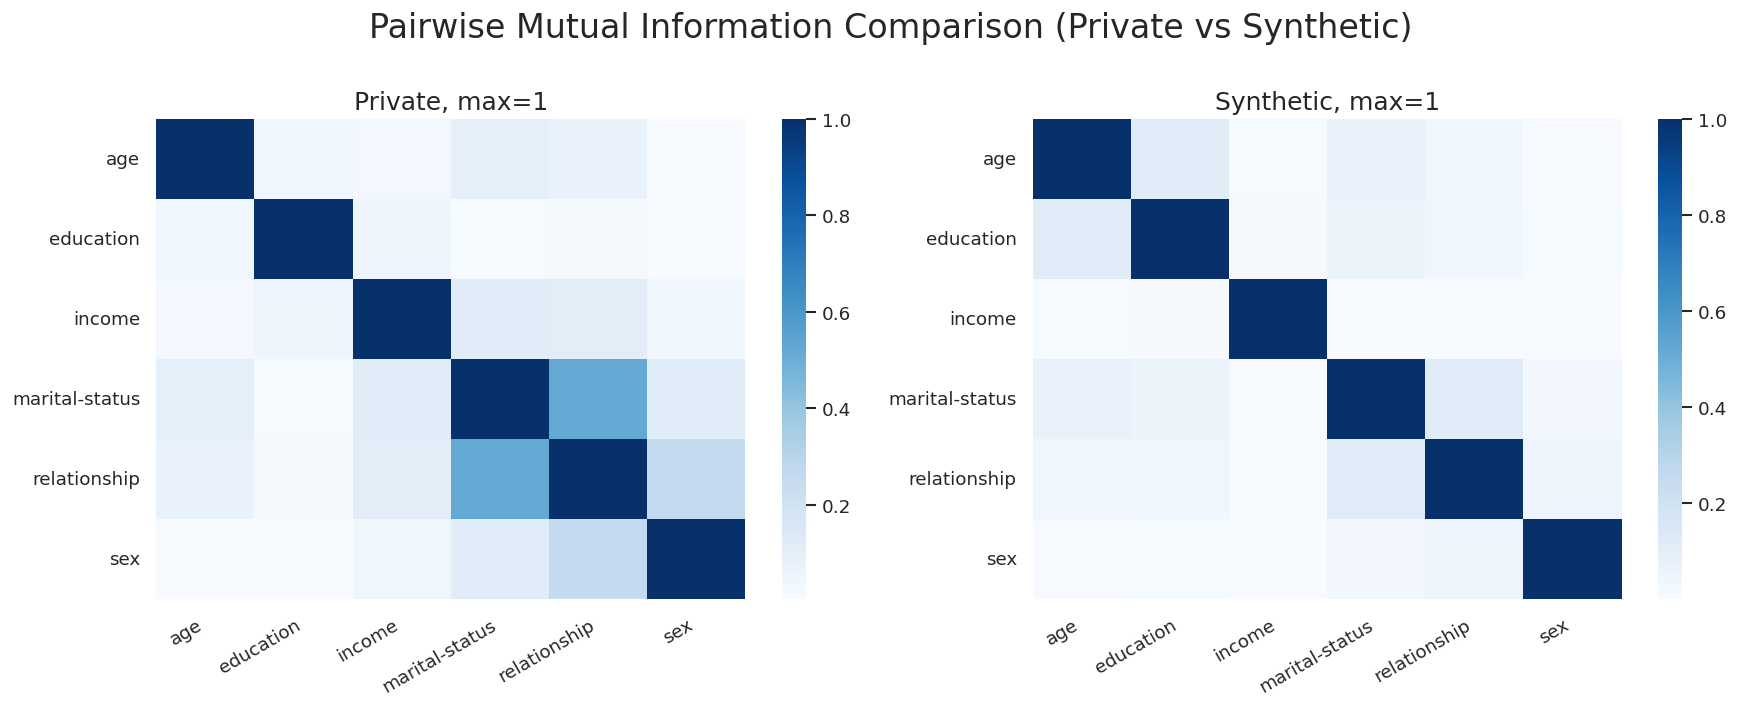

In [ ]:
c_inspector.mutual_information_heatmap()

Podemos observar que aunque las distribuciones difieren entre ambos datasets, este modo captura de mejor forma las correlaciones existentes entre los atributos.

### Random mode.

In [ ]:
# Instanciamos ModelInspector

random_description = read_json_file('random.json')['attribute_description']
r_inspector = ModelInspector(adult, random, random_description)

/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
/usr/local/lib/python3.10/dist-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprec

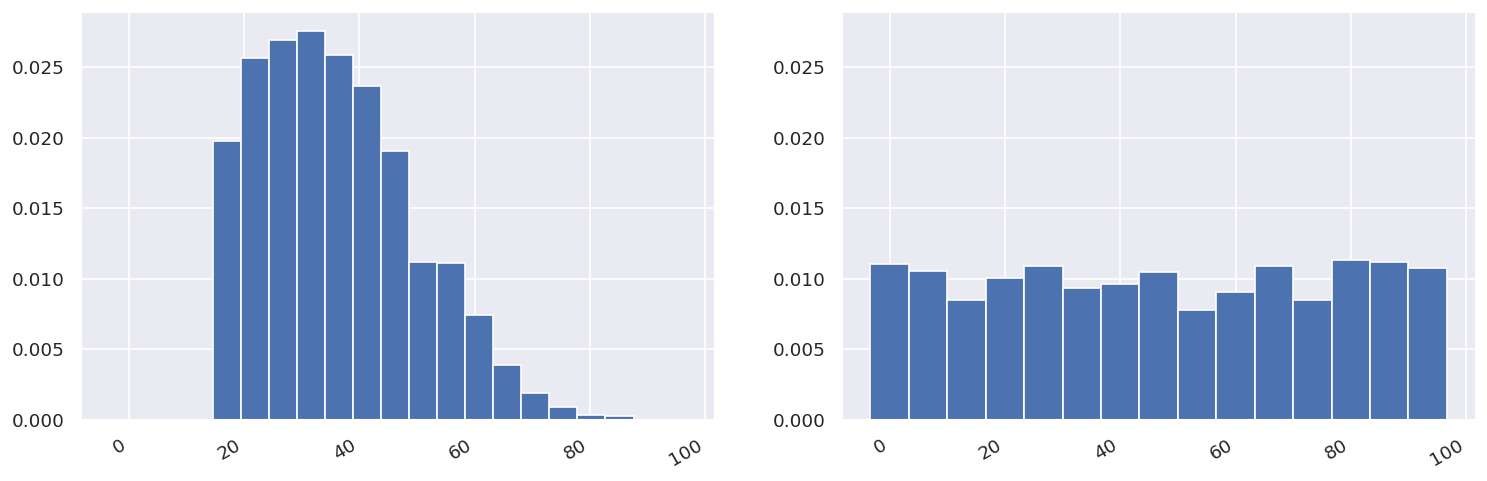

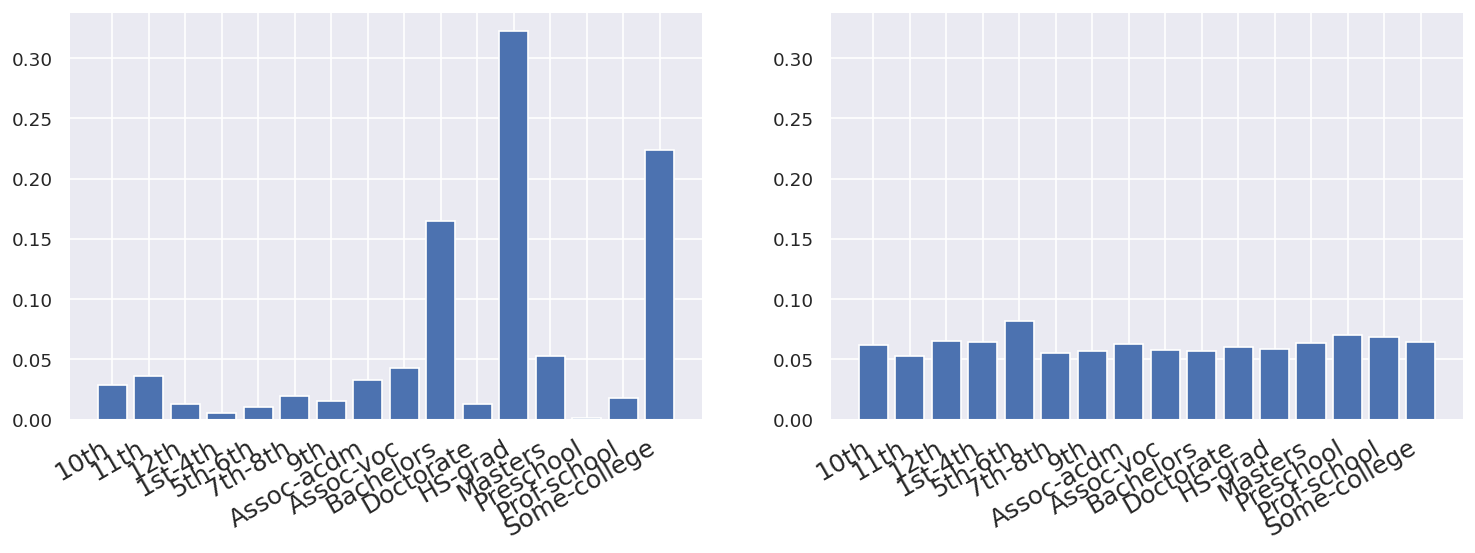

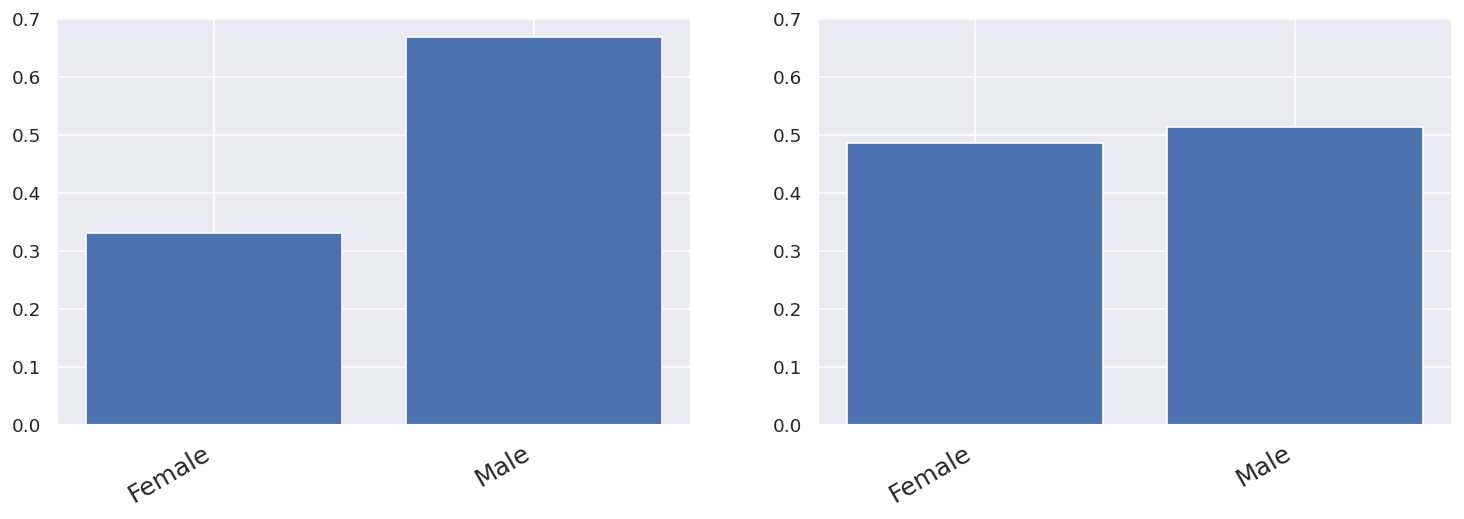

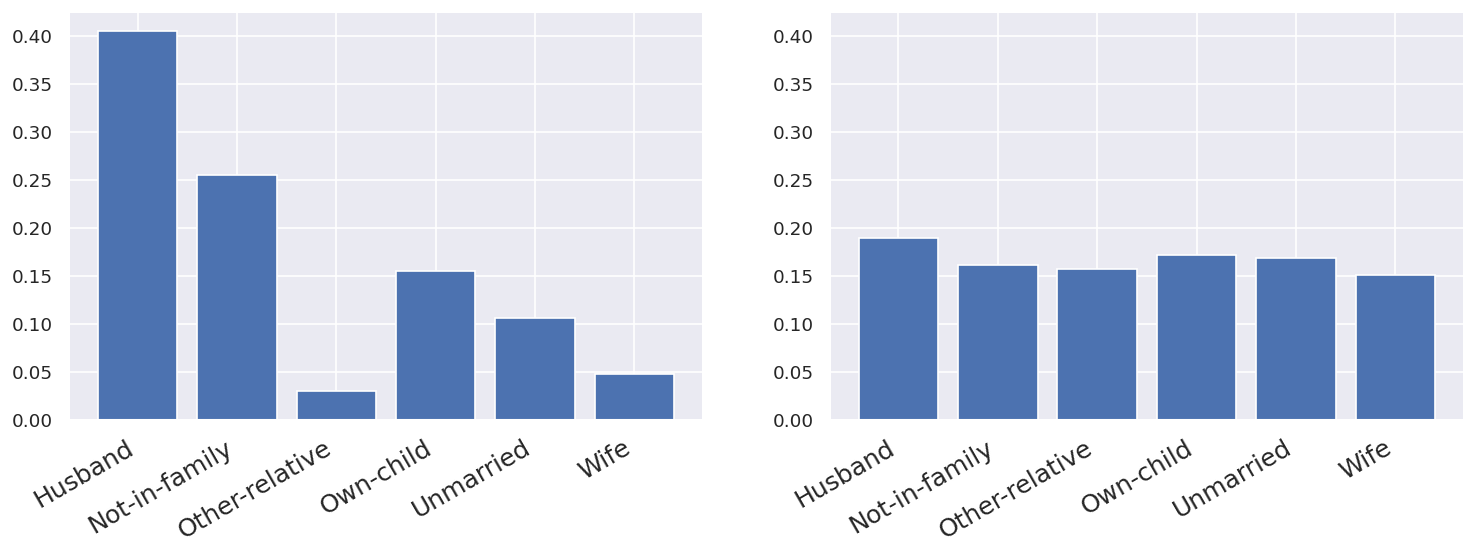

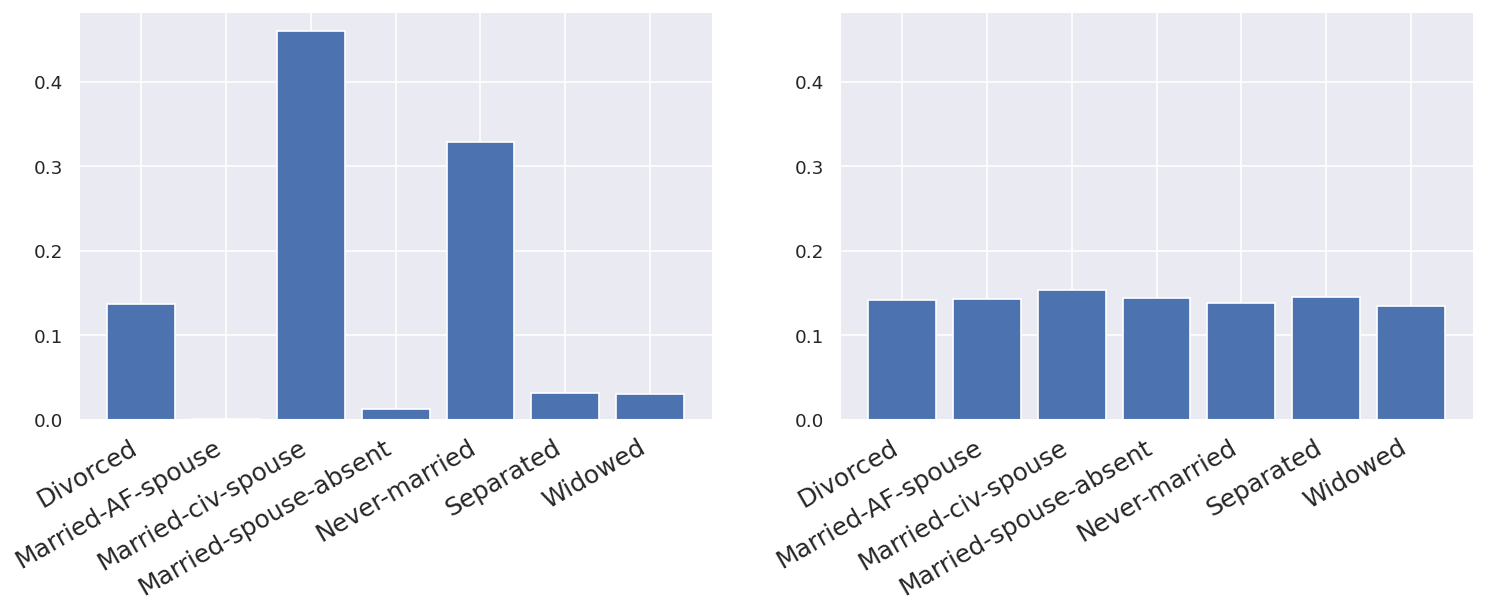

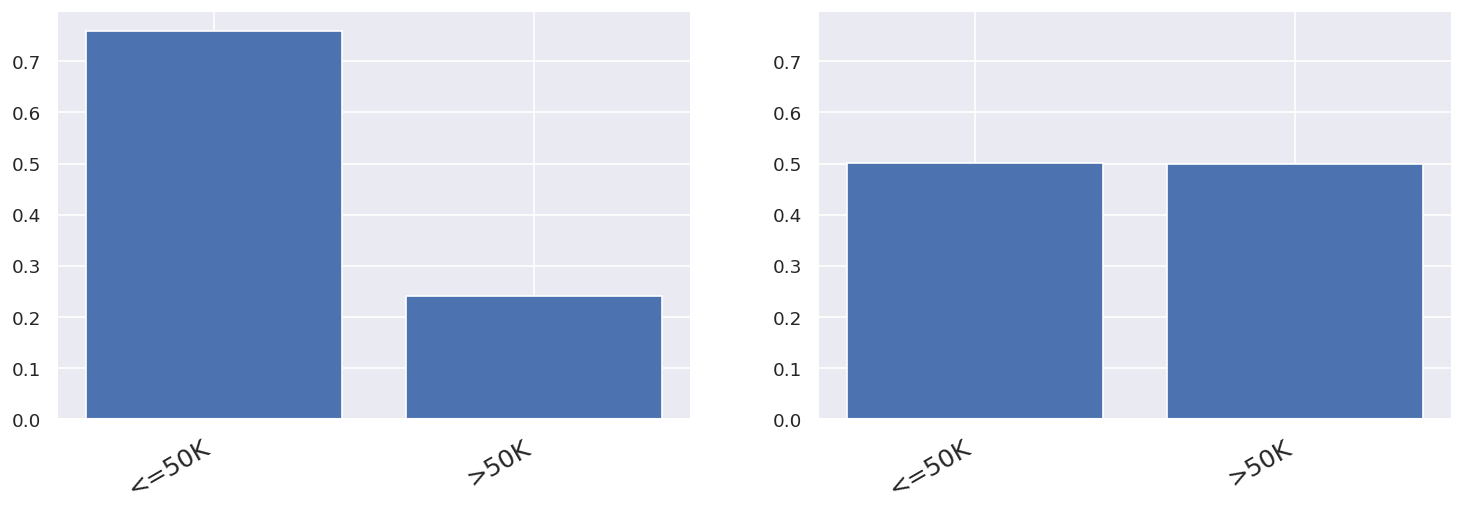

In [ ]:
# Con ModelInspector podemos comparar las distribuciones de los atributos.

for attr in random.columns:
  r_inspector.compare_histograms(attr)

Evidentemente en este caso las distribuciones difieren pues los datos sintéticos son sampleados de una distribución uniforme. Veamos las correlaciones:

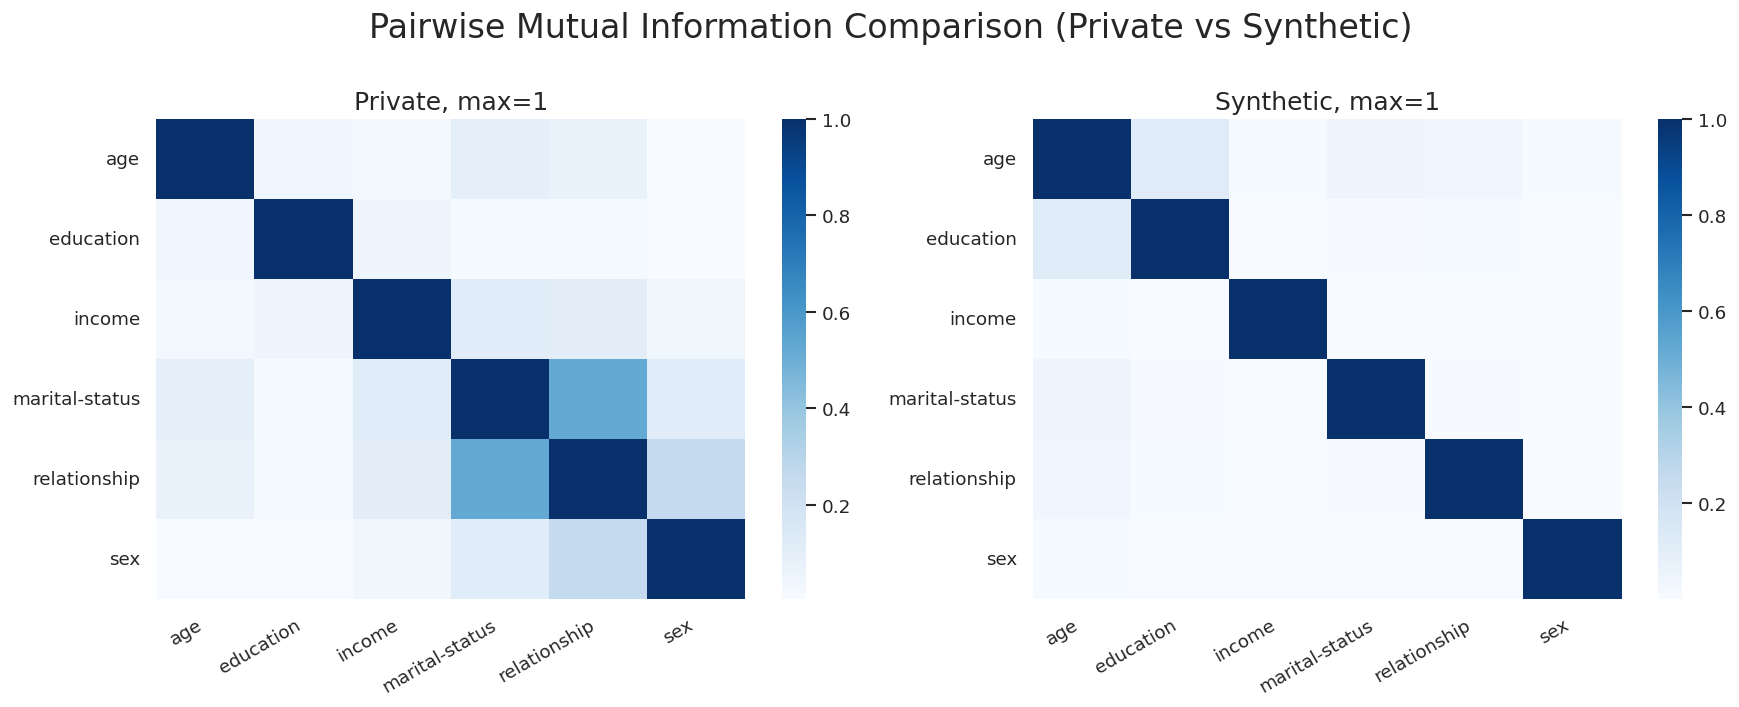

In [ ]:
r_inspector.mutual_information_heatmap()

## Referencias.

[1] Ping, H., Stoyanovich, J., & Howe, B. (2017). DataSynthesizer: Privacy-Preserving Synthetic Datasets. En Proceedings of the 29th International Conference on Scientific and Statistical Database Management (SSDBM '17) (p. 42-46). Association for Computing Machinery. https://doi.org/10.1145/3085504.3091117